<a href="https://colab.research.google.com/github/Sckibble/PyroPredictor-AI/blob/main/411PyroPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflowjs==4.22.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found exis

In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflowjs as tfjs

# Load the dataset
data = pd.read_csv('2010-2025Data.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data['season'] = (data['datetime'].dt.month % 12 + 3) // 3  # Assign seasons (1-4)

# Set classifiers and normalize data
fire_danger_mapping = {'Low': 0, 'Moderate': 1, 'High': 2, 'Very High': 3, 'Extreme':4}
data['fire_danger_level'] = data['fire_danger_level'].map(fire_danger_mapping)
features = ['tempmax', 'dew', 'humidity', 'precip', 'precipcover', 'windgust', 'windspeed', 'solarradiation', 'season']
classification = 'fire_danger_level'
X = data[features]
y = data[classification]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
feature_mins = scaler.data_min_
feature_maxs = scaler.data_max_

# Save these to JSON
import json
with open('scaler_stats.json', 'w') as f:
    json.dump({
        'features': features,
        'mins': feature_mins.tolist(),
        'maxs': feature_maxs.tolist()
    }, f)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

#model
model = keras.Sequential([
    keras.layers.InputLayer(shape=(9,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(len(fire_danger_mapping), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=35, validation_data=(X_test, y_test))

Epoch 1/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5188 - loss: 1.2116 - val_accuracy: 0.7948 - val_loss: 0.5398
Epoch 2/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8081 - loss: 0.4718 - val_accuracy: 0.8551 - val_loss: 0.3717
Epoch 3/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8641 - loss: 0.3415 - val_accuracy: 0.8515 - val_loss: 0.3122
Epoch 4/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8770 - loss: 0.2917 - val_accuracy: 0.8947 - val_loss: 0.2699
Epoch 5/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8978 - loss: 0.2516 - val_accuracy: 0.8812 - val_loss: 0.2821
Epoch 6/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8961 - loss: 0.2531 - val_accuracy: 0.8938 - val_loss: 0.2568
Epoch 7/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8993 - loss: 0.2326 - val_accuracy: 0.8974 - val_loss: 0.2378
Epoch 8/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9133 - loss: 0.2075 - val_accuracy: 0.

In [ ]:
import tempfile

# Save the model as a frozen graph
MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.saved_model.save(model, export_path)

# Convert the frozen graph to a TensorFlow.js model
tfjs.converters.convert_tf_saved_model(export_path, './tfjs_model')

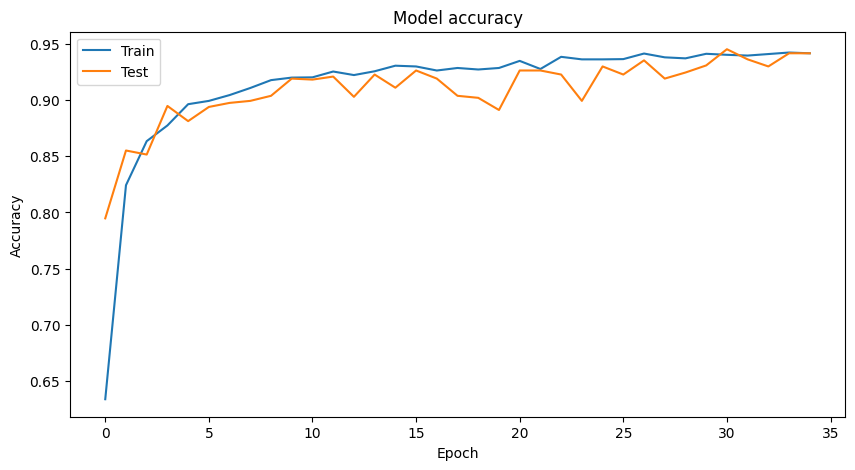

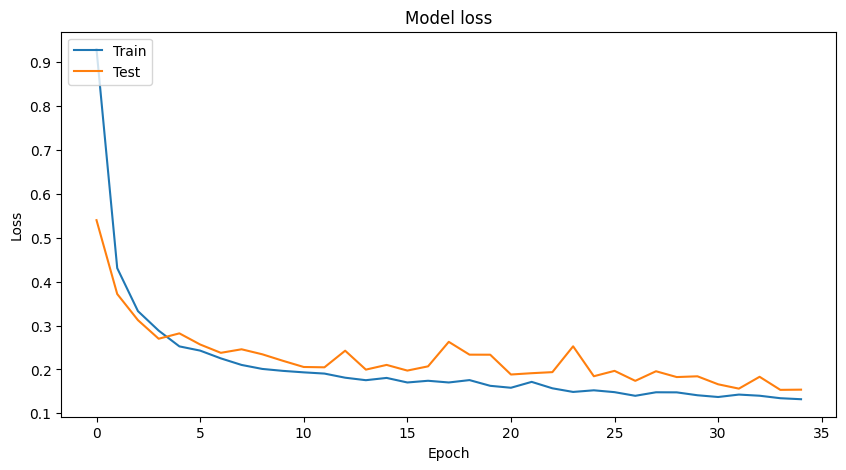

In [34]:
import matplotlib.pyplot as plt

#accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler

# Load scaler stats
with open('scaler_stats.json', 'r') as f:
    scaler_stats = json.load(f)

# Example input
exampleInput = [78, 45, 60, 0.1, 30, 20, 15, 800, 3]

# Normalize the input using the loaded scaler stats
features = scaler_stats['features']
mins = np.array(scaler_stats['mins'])
maxs = np.array(scaler_stats['maxs'])
exampleInput_normalized = (np.array(exampleInput) - mins) / (maxs - mins)


# Reshape the input for prediction
exampleInput_normalized = exampleInput_normalized.reshape(1, -1)

# Make the prediction
prediction = model.predict(exampleInput_normalized)

# Get the predicted class
predicted_class = np.argmax(prediction)

print(f"Predicted fire danger level: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted fire danger level: 2
